## Basic Neural Network

This notebook walks through the creation of a simple neural network with one input node, two hidden layers, and one output node.

### Network Architecture

- Input Layer:  1 node
- Hidden Layer  1: 1 nodes (arbitrary choice for demonstration)
- Hidden Layer  2: 1 nodes (arbitrary choice for demonstration)
- Output Layer: 1 node

We'll start by visualizing the network architecture using Graphviz.

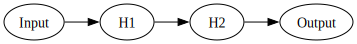

In [18]:
from graphviz import Digraph

def visualize_nn():
    dot = Digraph()
    
    # Set graph attributes for left-to-right orientation and size
    dot.attr(rankdir='LR', size='10,5')
    
    # Input Layer
    dot.node('I', 'Input')
    
    # Hidden Layer 1
    dot.node('H1', 'H1')
    
    # Hidden Layer 2
    dot.node('H2', 'H2')
    
    # Output Layer
    dot.node('O', 'Output')
    
    # Edges
    dot.edge('I', 'H1')
    dot.edge('H1', 'H2')
    dot.edge('H2', 'O')
    
    return dot

visualize_nn()


### Neural Network Implementation

We'll implement the forward pass of the neural network, where we compute the output of the network layer by layer.

#### Forward Pass Equations

For our simplified network, the equations are:

- **Input to Hidden Layer 1:**
  $$
  H1 = \sigma(W1 \cdot I + b1)
  $$

- **Hidden Layer 1 to Hidden Layer 2:**
  $$
  H2 = \sigma(W2 \cdot H1 + b2)
  $$

- **Hidden Layer 2 to Output:**
  $$
  O = \sigma(W3 \cdot H2 + b3)
  $$

Where:
- $ \sigma(x) $ is the activation function (we'll use the sigmoid function).
- $ W1, W2, W3 $ are the weight matrices for each layer.
- $ b1, b2, b3 $ are the bias terms for each layer.
- $ I $ is the input.



In [19]:
import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
input_size = 1
hidden1_size = 1
hidden2_size = 1
output_size = 1

np.random.seed(1)
W1 = np.random.rand(input_size, hidden1_size)
b1 = np.random.rand(hidden1_size)
W2 = np.random.rand(hidden1_size, hidden2_size)
b2 = np.random.rand(hidden2_size)
W3 = np.random.rand(hidden2_size, output_size)
b3 = np.random.rand(output_size)

# Forward pass
def forward_pass(X):
    H1 = sigmoid(np.dot(X, W1) + b1)
    H2 = sigmoid(np.dot(H1, W2) + b2)
    O = sigmoid(np.dot(H2, W3) + b3)
    return O

# Example input
X = np.array([[0.5]])
output = forward_pass(X)
print("Output of the network:", output)


Output of the network: [[0.54406737]]


### Backpropagation and Training

We'll train the neural network using backpropagation. This involves calculating the loss, computing the gradient of the loss with respect to the weights, and updating the weights to minimize the loss.

#### Loss Function

We'll use the mean squared error (MSE) as our loss function:
$$
L = \frac{1}{2} \cdot (O_{\text{pred}} - O_{\text{true}})^2
$$

#### Backpropagation Algorithm

We'll update the weights using the gradient descent method:

1. **Compute the loss** between the predicted output and the true output.
2. **Backpropagate** the loss through the network to compute the gradients.
3. **Update** the weights using the gradients and a learning rate.


In [20]:
# True output for training
y_true = np.array([[1]])

# Training parameters
learning_rate = 0.1
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    H1 = sigmoid(np.dot(X, W1) + b1)
    H2 = sigmoid(np.dot(H1, W2) + b2)
    O = sigmoid(np.dot(H2, W3) + b3)
    
    # Calculate the loss (MSE)
    loss = 0.5 * (y_true - O) ** 2
    
    # Backpropagation
    dO = (O - y_true) * sigmoid_derivative(O)
    dH2 = np.dot(dO, W3.T) * sigmoid_derivative(H2)
    dH1 = np.dot(dH2, W2.T) * sigmoid_derivative(H1)
    
    # Update weights and biases
    W3 -= learning_rate * np.dot(H2.T, dO)
    b3 -= learning_rate * np.sum(dO, axis=0)
    W2 -= learning_rate * np.dot(H1.T, dH2)
    b2 -= learning_rate * np.sum(dH2, axis=0)
    W1 -= learning_rate * np.dot(X.T, dH1)
    b1 -= learning_rate * np.sum(dH1, axis=0)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {np.sum(loss)}')

print("Training complete.")


Epoch 0, Loss: 0.10393728123644523
Epoch 100, Loss: 0.028852247567119793
Epoch 200, Loss: 0.014092016829799261
Epoch 300, Loss: 0.008854840979798604
Epoch 400, Loss: 0.006313773416746348
Epoch 500, Loss: 0.004848288927054119
Epoch 600, Loss: 0.003906962697985976
Epoch 700, Loss: 0.003256408094114442
Epoch 800, Loss: 0.0027824284778798624
Epoch 900, Loss: 0.002423067017565997
Training complete.


### Conclusion

In this notebook, we've built a simple neural network with one input, two hidden layers (each with one node), and one output. We visualized the network structure, implemented the forward pass, and trained the network using backpropagation. This is a foundational example that can be extended to more complex networks with more layers and nodes.
